<a href="https://colab.research.google.com/github/lamaachi/MyDataScience_Projects/blob/main/cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
# Charger le dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [ ]:
# Afficher des informations sur les données
print(f"Dimensions des données d'entraînement : {X_train.shape}")
print(f"Dimensions des données de test : {X_test.shape}")

Dimensions des données d'entraînement : (50000, 32, 32, 3)
Dimensions des données de test : (10000, 32, 32, 3)


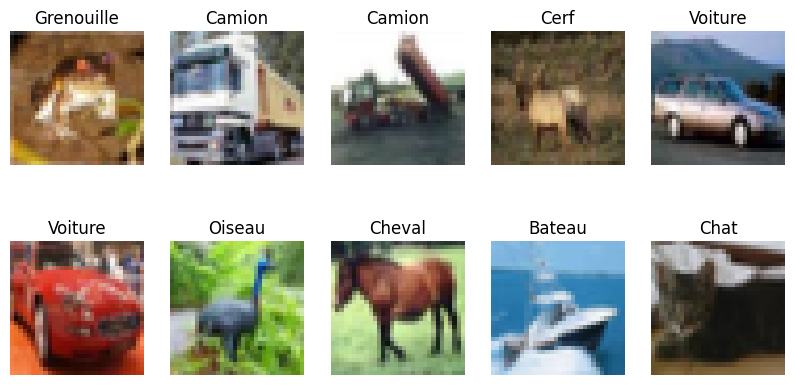

In [ ]:
# Afficher quelques exemples d'images du dataset
class_names = ['Avion', 'Voiture', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
# Préparation des données
X_train = X_train.astype('float32') / 255.0  # Normaliser les pixels entre 0 et 1
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Convertir les étiquettes en encodage one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Construction du modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Couche de convolution (32 filtres 3x3)
    MaxPooling2D(pool_size=(2, 2)),  # Couche de pooling pour réduire la taille (2x2)
    Conv2D(64, (3, 3), activation='relu'),  # Deuxième couche de convolution (64 filtres 3x3)
    MaxPooling2D(pool_size=(2, 2)),  # Deuxième couche de pooling
    Flatten(),  # Convertir les données 2D en un vecteur 1D
    Dense(128, activation='relu'),  # Couche entièrement connectée (128 neurones)
    Dense(1024, activation='relu'),  # Couche entièrement connectée (128 neurones)
    Dense(10, activation='softmax')  # Couche de sortie (10 classes, activation softmax)
])

In [ ]:
# Compilation du modèle
model.compile(
    optimizer='adam',  # Optimiseur Adam
    loss='categorical_crossentropy',  # Fonction de perte pour classification multi-classes
    metrics=['accuracy']  # Métrique pour évaluer le modèle
)

In [ ]:
# Résumé du modèle
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │         132,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456,778 (1.74 MB)

 Trainable params: 456,778 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entraîner le modèle
history = model.fit(
    X_train, y_train,  # Données d'entraînement
    validation_data=(X_test, y_test),  # Données de validation
    epochs=5,  # Nombre d'époques
    batch_size=32  # Taille des lots
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.3829 - loss: 1.6601 - val_accuracy: 0.6105 - val_loss: 1.1029
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6194 - loss: 1.0718 - val_accuracy: 0.6675 - val_loss: 0.9470
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6902 - loss: 0.8836 - val_accuracy: 0.6737 - val_loss: 0.9348
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7309 - loss: 0.7678 - val_accuracy: 0.6923 - val_loss: 0.8877
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7618 - loss: 0.6832 - val_accuracy: 0.6909 - val_loss: 0.9290


In [ ]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Précision sur les données de test : {test_accuracy * 100:.2f}%")

Précision sur les données de test : 69.09%


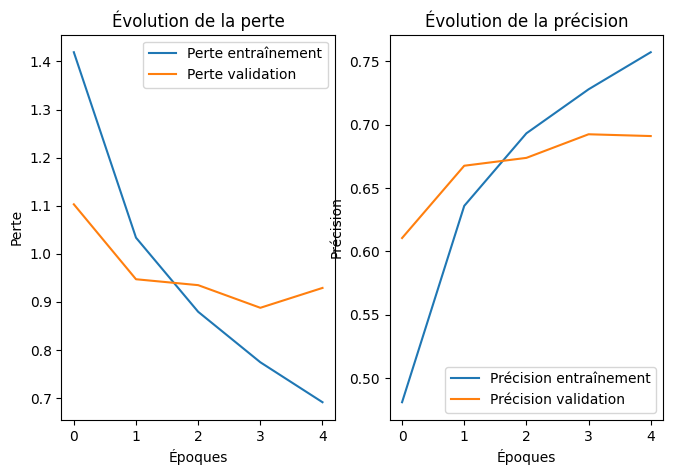

In [ ]:
# Visualisation des courbes d'entraînement
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Évolution de la perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Courbe de précision
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Évolution de la précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.show()